In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [6]:
df.drop(['Channel', 'Region'], axis = 1, inplace = True)

In [7]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


<AxesSubplot:>

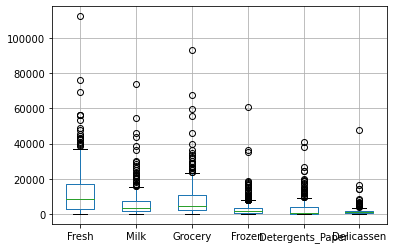

In [8]:
df.boxplot()

<AxesSubplot:>

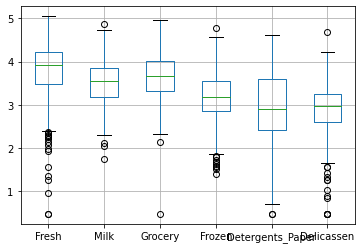

In [9]:
df.apply(np.log10).boxplot()

In [10]:
array = df.values

In [11]:
array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [12]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [13]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [31]:
#min_samples=4
dbscan = DBSCAN(eps = 0.4, min_samples = 3)
dbscan.fit(X)

DBSCAN(eps=0.4, min_samples=3)

In [32]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1,  3, -1,  1, -1,  6,  0,  3,  1, -1, -1,  1, -1, -1, -1,  1,  3,
       -1, -1, -1,  6,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1,  2,  1,  1, -1,  2,  1,  3,  0, -1, -1, -1,  1, -1,  4, -1,
       -1,  1, -1, -1, -1, -1,  3,  1, -1, -1,  1,  1,  1,  2, -1,  1,  0,
       -1, -1, -1, -1, -1,  1,  1, -1, -1,  2,  1,  4,  1,  1,  1, -1, -1,
        3, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  5, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1, -1,  1,  3,  2,  3,  1,  1, -1, -1, -1, -1,  1,  1,  1,
        2, -1, -1, -1,  1,  3, -1, -1,  1, -1, -1, -1,  2, -1,  1, -1,  1,
       -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  3,  1,  1, -1, -1, -1,  1,
        1, -1,  1, -1, -1, -1,  1, -1,  1,  3, -1, -1, -1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1

In [33]:
cl = pd.DataFrame(dbscan.labels_, columns = ['cluster'])

In [34]:
cl

,cluster
0,-1
1,3
2,-1
3,1
4,-1
...,...
435,-1
436,5
437,-1
438,1


In [35]:
clustered = pd.concat([df, cl], axis = 1)

In [37]:
clustered

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,-1
1,7057,9810,9568,1762,3293,1776,3
2,6353,8808,7684,2405,3516,7844,-1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,-1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,-1
436,39228,1431,764,4510,93,2346,5
437,14531,15488,30243,437,14841,1867,-1
438,10290,1981,2232,1038,168,2125,1


In [36]:
clustered[clustered['cluster'] == -1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,-1
2,6353,8808,7684,2405,3516,7844,-1
4,22615,5410,7198,3915,1777,5185,-1
9,6006,11093,18881,1159,7425,2098,-1
10,3366,5403,12974,4400,5977,1744,-1
...,...,...,...,...,...,...,...
427,31012,16687,5429,15082,439,1163,-1
430,3097,4230,16483,575,241,2080,-1
431,8533,5506,5160,13486,1377,1498,-1
435,29703,12051,16027,13135,182,2204,-1


In [38]:
clustered.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
cluster                 0.240909
dtype: float64

In [39]:
clustered.sort_values('cluster')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,-1
172,955,5479,6536,333,2840,707,-1
173,514,7677,19805,937,9836,716,-1
351,1210,10044,22294,1741,12638,3137,-1
176,45640,6958,6536,7368,1532,230,-1
...,...,...,...,...,...,...,...
281,12238,7108,6235,1093,2328,2079,6
5,9413,8259,5126,666,1795,1451,6
226,20782,5921,9212,1759,2568,1553,6
279,17360,6200,9694,1293,3620,1721,6


In [40]:
X.shape

(440, 6)

In [41]:
min_samples

4

### DBSCAN on Sample dataset

In [42]:
from sklearn.datasets import make_moons, make_blobs

X, y = make_moons(1000)
X = X + np.random.rand(1000, 2)*0.4

In [43]:
data = pd.DataFrame(X)
data.columns = ['feature 1', 'feature 2']
data['class'] = y
data

,feature 1,feature 2,class
0,0.457394,1.288902,0
1,1.357709,0.304272,0
2,2.343736,0.602760,1
3,0.864796,0.820775,0
4,1.939456,0.072787,1
...,...,...,...
995,-0.533116,0.715598,0
996,-0.837285,0.446221,0
997,1.751907,-0.254439,1
998,2.050634,0.246773,1


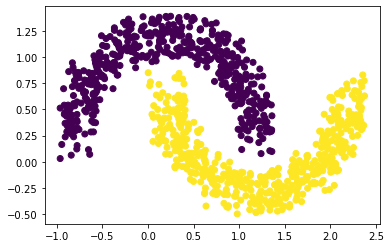

In [44]:
plt.scatter(data['feature 1'], data['feature 2'], c = y)

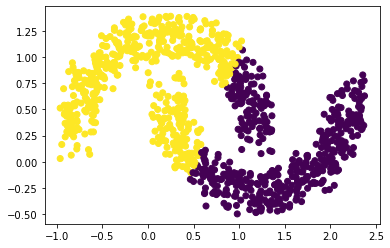

In [45]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters = 2, max_iter = 5, algorithm = 'auto')
model_kmeans.fit(data.iloc[:,:2])
plt.scatter(data['feature 1'], data['feature 2'], c = model_kmeans.labels_)

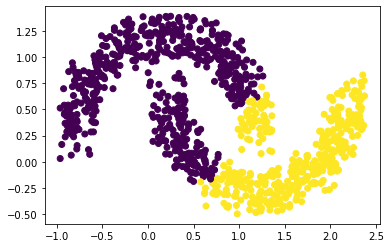

In [46]:
from sklearn.cluster import AgglomerativeClustering
model_agglo = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
model_agglo.fit(data.iloc[:,:2])
plt.scatter(data['feature 1'], data['feature 2'], c = model_agglo.labels_)

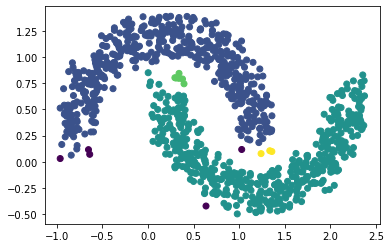

In [47]:
model_dbscan = DBSCAN(eps = 0.1, min_samples = 3)
model_dbscan.fit(data.iloc[:,:2])
plt.scatter(data['feature 1'], data['feature 2'], c = model_dbscan.labels_)

In [49]:
from sklearn.metrics import silhouette_score
silhouette_score(data.iloc[:,:3], model_dbscan.labels_)

0.04316573281769077

In [50]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(data.iloc[:,:3], model_dbscan.labels_)

275.7854983029935

StopIteration: 

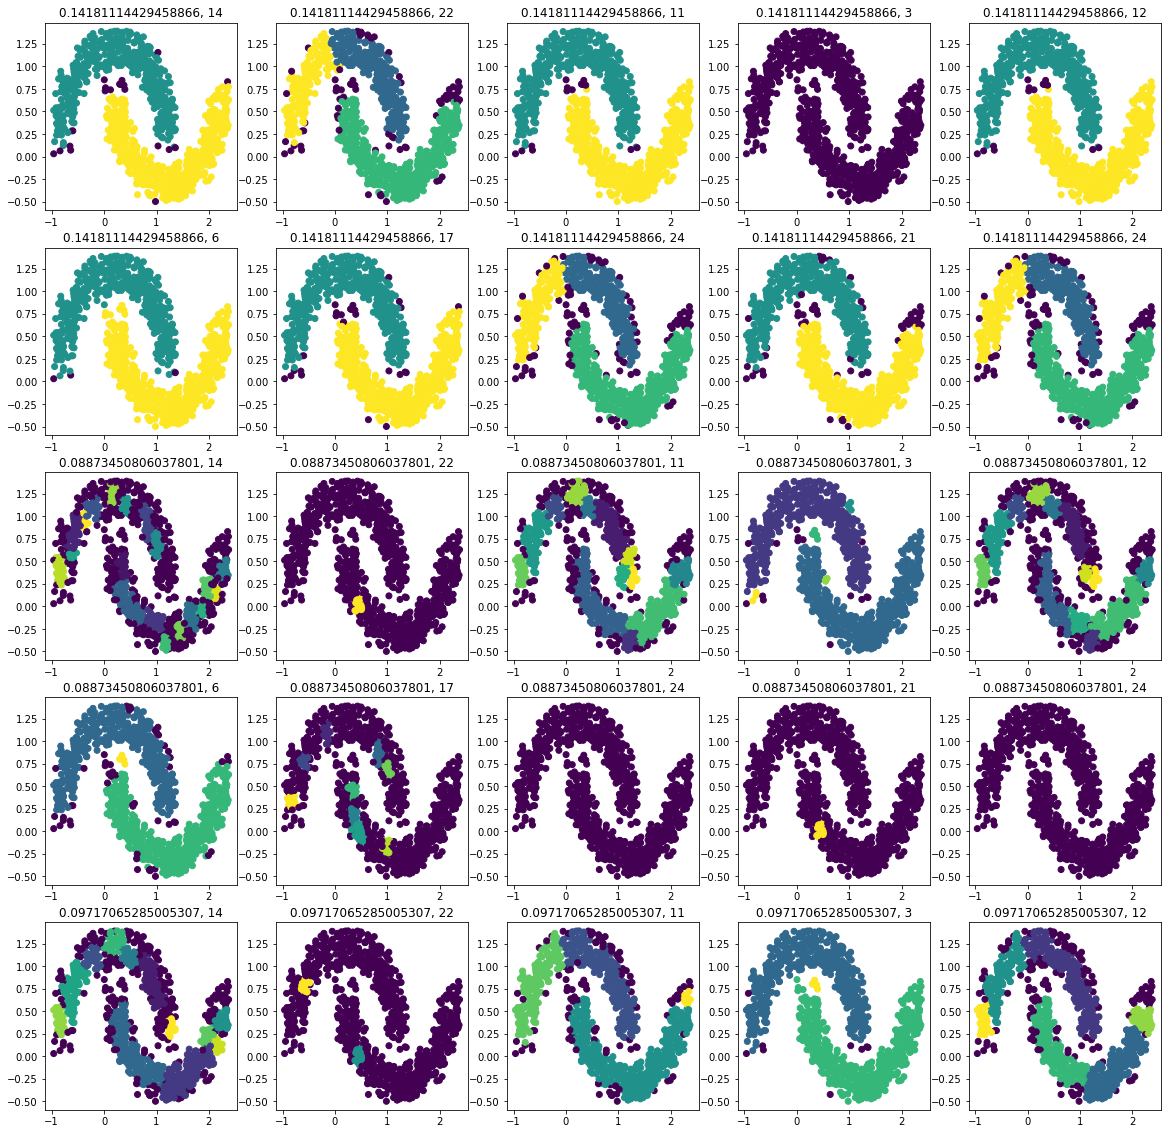

In [51]:
eps = np.random.rand(10) * 0.15

# m.fit(X)
# preds = m.labels_

epsilons = 0.05 + np.random.rand(5) * 0.10
min_samples_list = np.random.randint(3, 25, size=len(eps))

fig, ax = plt.subplots(5, 5, figsize=(20, 20))

ax = ax.flat

for epsilon in epsilons:
  for min_samples in min_samples_list:
    m = DBSCAN(eps=epsilon, min_samples=min_samples)
    m.fit(X)
    preds = m.labels_
    axis = next(ax)
    axis.scatter(X[:,0], X[:,1], c=preds)
    axis.set_title(f'{epsilon}, {min_samples}')